In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw
import numpy as np
from IPython.display import display,Image

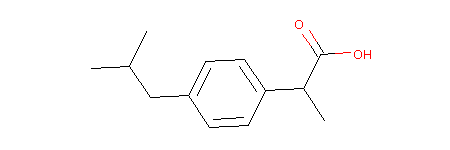

In [2]:
ibu=Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(ibu)
display(ibu)

In [3]:
import rdkit.Chem.Lipinski as Lipinksy
Lipinksy.NumHDonors(ibu)

1

In [4]:
Lipinksy.NumHAcceptors(ibu)

1

In [5]:
Lipinksy.rdMolDescriptors.CalcExactMolWt(ibu)

206.130679816

In [6]:
Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(ibu)[0]

3.073200000000001

In [7]:
suppl = Chem.SDMolSupplier("1806066493497768808.sdf")

In [8]:
Chem.MolToSmiles(suppl[20])

'[N-]=[N+]=NC1(CO)OC(n2ccc(=O)[nH]c2=O)C(O)C1O'

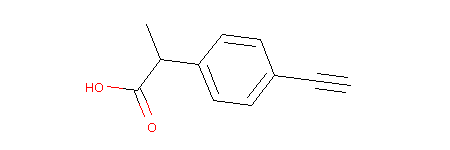

In [9]:
ibu_mod=Chem.MolFromSmiles('C#CC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(ibu_mod)
display(ibu_mod)

In [10]:
Chem.MolToSmiles(suppl[20])

'[N-]=[N+]=NC1(CO)OC(n2ccc(=O)[nH]c2=O)C(O)C1O'

In [11]:
smiles=[]
for i in range(1,500):
    mol=Chem.MolToSmiles(suppl[i])
    if "[N-]=[N+]=N" in mol:
        smiles.append(mol.replace("[N-]=[N+]=N","C%98(C%99=CC=C(C=C%99)C(C)C(=O)O)=CN=NN%98"))
    elif "N=[N+]=[N-]" in mol:
        smiles.append(mol.replace("N=[N+]=[N-]","N%98C(C%99=CC=C(C=C%99)C(C)C(=O)O)=CN=N%98"))
                  

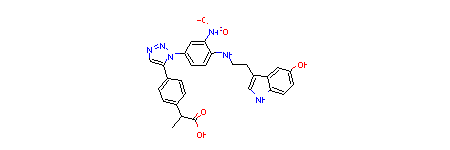

In [12]:
monster=Chem.MolFromSmiles(smiles[400])
AllChem.Compute2DCoords(monster)
display(monster)

In [13]:
mols=list(map(lambda smile: Chem.MolFromSmiles(smile),smiles))
mols_filtered=list(filter(lambda mol: Lipinksy.NumHDonors(mol)<=5,mols))
mols_filtered=list(filter(lambda mol: Lipinksy.NumHAcceptors(mol)<=10,mols_filtered))
mols_filtered=list(filter(lambda mol: Lipinksy.rdMolDescriptors.CalcExactMolWt(mol)<=500,mols_filtered))
mols_filtered=list(filter(lambda mol: Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(mol)[0]<=5,mols_filtered))

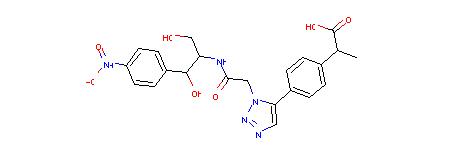

In [14]:
mols_filtered[10]

In [15]:
m3d=Chem.AddHs(mols_filtered[10])
Chem.AllChem.EmbedMolecule(m3d)
AllChem.MMFFOptimizeMolecule(m3d,maxIters=500,nonBondedThresh=200 )

0

In [16]:
import nglview as nv
view=nv.show_rdkit(m3d)

In [17]:
view

A Jupyter Widget